In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("chennai_house_price_prediction.csv")

In [3]:
df.head(20)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


In [4]:
df.shape

(7109, 19)

In [5]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [6]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [7]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

In [8]:
df['AREA'] = df['AREA'].replace({"Karapakam":"Karapakkam","TNagar":"T Nagar","Adyr":"Adyar","KKNagar":"KK Nagar","Velchery":"Velachery"
                   ,"Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar","Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet"})

In [9]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

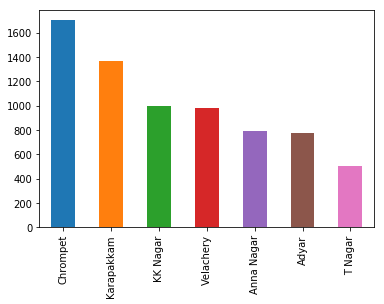

In [10]:
df['AREA'].value_counts().plot.bar()

In [11]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [12]:
df['SALE_COND'] = df['SALE_COND'].replace({"Adj Land":"AdjLand","Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial"})

In [13]:
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [14]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace({"Other":"Others","Comercial":"Commercial"})

In [15]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [16]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({"All Pub":"AllPub"})

In [17]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [18]:
df['STREET'] = df['STREET'].replace({'Pavd':'Paved',"NoAccess":"No Access"})

In [19]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [20]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

## Computing all the missing values

In [21]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [22]:
##Computing with mode value
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)

In [23]:
df['N_BATHROOM'].value_counts()


1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [24]:
##Computing with mode value
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [25]:
#Computing Total Quality Score based on other quality scores
df['QS_OVERALL'].fillna((df['QS_ROOMS']+df['QS_BATHROOM']+df['QS_BEDROOM'])/3,inplace = True)

In [26]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

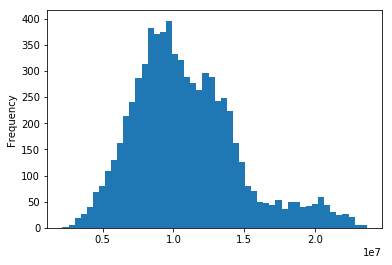

In [27]:
df['SALES_PRICE'].plot.hist(bins = 50)

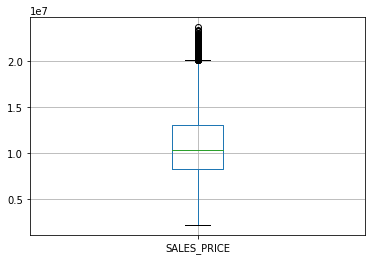

In [28]:
df.boxplot(['SALES_PRICE'])

In [29]:
df = df[df['SALES_PRICE']<17000000]

In [30]:
df.shape

(6560, 19)

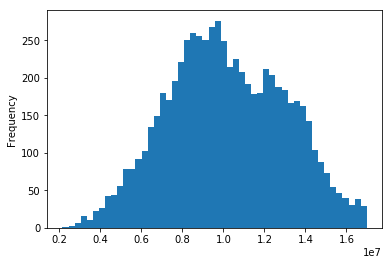

In [31]:
df['SALES_PRICE'].plot.hist(bins = 50)

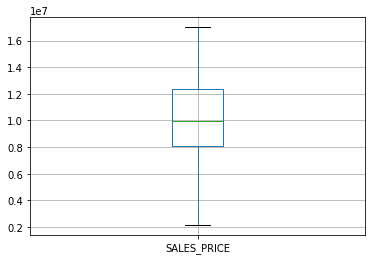

In [32]:
df.boxplot(['SALES_PRICE'])

## Building a Simple linear Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
x = df['INT_SQFT']

In [35]:
y = df['SALES_PRICE']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [37]:
x_train.head()

3507    1290
5693    1666
6101    1418
4076     897
5595    1275
Name: INT_SQFT, dtype: int64

In [38]:
y_train.head()

3507     8545605
5693    13390780
6101     9354620
4076     9162950
5595     6909125
Name: SALES_PRICE, dtype: int64

In [39]:
x_train.shape,x_test.shape

((5248,), (1312,))

In [40]:
x_train = x_train.values.reshape(5248,1)
x_test = x_test.values.reshape(1312,1)
y_train = y_train.values.reshape(5248,1)
y_test = y_test.values.reshape(1312,1)

In [41]:
y_test.shape

(1312, 1)

In [42]:
lr = LinearRegression()

In [43]:
##Fitting the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
#Predicting the training set
predict_train = lr.predict(x_train)

In [45]:
predict_train, y_train

(array([[ 9961942.70651573],
        [11373701.23116602],
        [10442541.35320519],
        ...,
        [ 8647805.78197423],
        [ 7799248.79641316],
        [12124636.6166183 ]]), array([[ 8545605],
        [13390780],
        [ 9354620],
        ...,
        [ 9446200],
        [10312400],
        [14409230]], dtype=int64))

In [46]:
from sklearn.metrics import mean_absolute_error as mae

In [47]:
#Predicting the error for training data set
k = mae(predict_train,y_train)
print("Mean Absolute error in Train ",k)

Mean Absolute error in Train  1879178.7359840972


In [48]:
#Predict in testing data set and find the error
predict_test = lr.predict(x_test)

#Predicting the error for training data set
k = mae(predict_test,y_test)
print("Mean Absolute error in Test ",k)

Mean Absolute error in Test  1842296.1637678838


In [49]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [50]:
## Percentage of error
def percentage(actual, predicted, n):
    err = 0
    for i in range(n):
        err += abs(actual[i] - predicted[i])/actual[i]
    total = err/n
    return(total)

train_percentage_error = percentage(y_train,predict_train,len(y_train))
test_percentage_error = percentage(y_test,predict_test,len(y_test))

In [51]:
train_percentage_error[0]

0.21023346849672478

In [52]:
test_percentage_error[0]

0.2057144974453799

## Build linear model by considering all the data 

In [53]:
x = df.drop(['SALES_PRICE'],axis = 1)
y= df['SALES_PRICE']
x.shape, y.shape

((6560, 18), (6560,))

In [54]:
df['PRT_ID'].nunique()

6560

In [55]:
##Linear models can handle only continous data so convert all object data into continous data by adding dummy values(Preferably one hot encoding)\
##One hot encoding

#Drop PRT_ID since it has more unique values and it does not contribute much to the linear line

df = df.drop(['PRT_ID'],axis = 1)
x.shape

(6560, 18)

In [56]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [57]:
print("Sales Condition uniq ",x['SALE_COND'].nunique())
print("Area uniq ",x['AREA'].nunique())
print("Park Facility ",x['PARK_FACIL'].nunique())
print("Build type uniq ",x['BUILDTYPE'].nunique())
print("Utility Available uniq ",x['UTILITY_AVAIL'].nunique())
print("STREET uniq ",x['STREET'].nunique())
print("Mzzone uniq ",x['MZZONE'].nunique())

Sales Condition uniq  5
Area uniq  7
Park Facility  3
Build type uniq  3
Utility Available uniq  4
STREET uniq  3
Mzzone uniq  6


In [58]:
df_final = pd.get_dummies(df,drop_first=True)

In [59]:
df_final.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.33,144400,...,0,0,0,0,1,0,0,0,0,0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.09,92114,...,1,0,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.01,77042,...,0,0,1,0,1,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.29,74063,...,0,0,0,0,0,1,0,0,0,0
5,1220,36,2.0,1.0,4,4.5,2.6,3.1,3.32,198316,...,0,1,0,1,0,0,0,1,0,0


In [60]:
y.shape

(6560,)

In [61]:
x.shape

(6560, 18)

In [62]:
x = df_final.drop(['SALES_PRICE'],axis = 1)

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5248, 34), (1312, 34), (5248,), (1312,))

In [64]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
predict_train = lr.predict(x_train)

In [66]:
predict_train

array([ 8415305.81644238, 13284750.72052726,  9191106.8373771 , ...,
        9373731.82868977, 11470632.64550352, 13799174.40726949])

In [67]:
y_train

3507     8545605
5693    13390780
6101     9354620
4076     9162950
5595     6909125
3948    12232800
5291     8380775
115      7304000
31       9042050
3135     4158500
1866     6063250
816      8824390
639      8141330
1326     9329120
2920    14214780
6852    10406790
4645    10862580
1867     9626680
599     10787350
5469    10516450
1792     9843580
6610    12090050
4780     9255095
5280    10559330
6851     4613750
6952     7062250
4970    12000450
3693    12038110
2841    10904600
4913     8426070
          ...   
6935    15086550
4460    10699500
3682    11190500
4935     6397375
1285     7633500
6961    10559260
5457    10942360
5735    11045865
2643    12709550
6076    12732500
2592     9024860
834     14350560
1830     7016840
142     10200600
3171    15148940
3453    11098160
3744     9155320
6758     9896880
6039    16129140
4794    11285250
5758     8545660
509      9125250
6795     7744625
6203    10013250
3369     8936650
4090    12879720
5609     7955250
5646     94462

In [68]:
##MAE in predicting training Dataset
k = mae(predict_train,y_train)
k

405350.0250681851

In [69]:
##Prediction and mean absolute error 
predict_test = lr.predict(x_test)
k = mae(predict_test,y_test)
k

403938.34035144496

In [70]:
## Percentage of error
def percentage(actual, predicted, n):
    err = 0
    for i in range(n):
        err += abs(actual.iloc[i] - predicted[i])/actual.iloc[i]
    total = err/n
    return(total)

train_percentage_error = percentage(y_train,predict_train,len(y_train))
test_percentage_error = percentage(y_test,predict_test,len(y_test))

In [71]:
train_percentage_error

0.045070640160331694

In [72]:
test_percentage_error

0.04383637650483281

## Parameters of Linear Regression

In [73]:
# lr.coef_ = lr.coef_ .reshape(-1)
lr.coef_

array([ 3.43627373e+03, -9.35576773e+01, -1.77298475e+05, -1.47026961e+05,
        3.98981133e+05, -6.38928274e+04, -6.18038473e+04, -4.59817803e+04,
        2.46906103e+05,  1.52001043e+00,  5.61162680e+05, -4.15424818e+05,
       -1.80587541e+06, -2.40067912e+06,  7.19117910e+05, -1.48789468e+06,
        3.17760585e+05, -9.50681458e+04, -2.02793343e+04, -2.76520721e+05,
       -5.12904378e+05,  9.91354022e+05, -3.90727652e+06, -3.22452211e+06,
       -2.92572533e+05, -2.52056145e+05, -1.28809666e+05, -1.06525837e+06,
       -4.98511882e+05,  5.69352532e+05,  1.18946386e+06,  1.75737011e+06,
        2.33591792e+06,  2.90805159e+06])

## Marking all the coefficients

Text(0.5,1,'Coefficient plot')

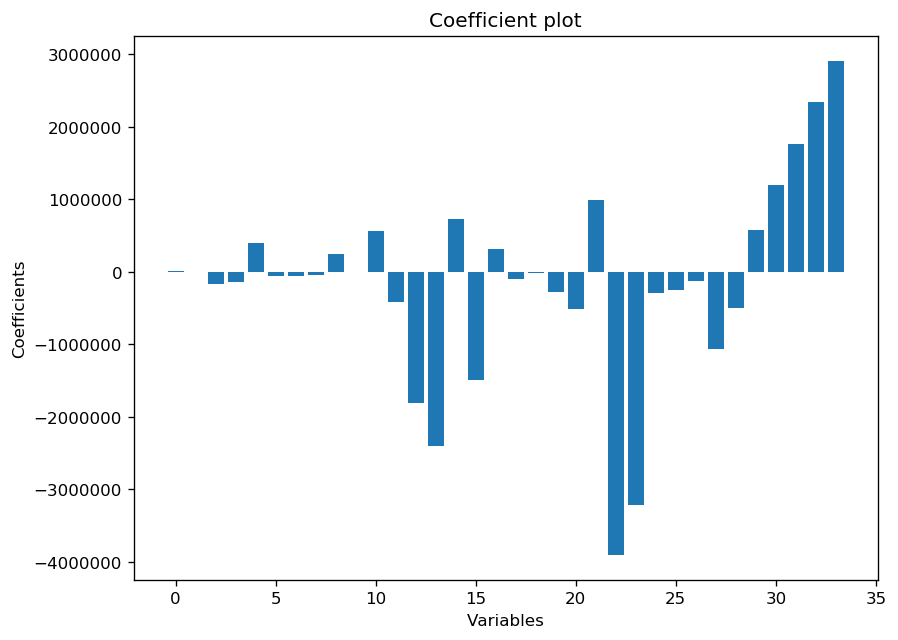

In [74]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

## Checking assumptions of Linear Model

In [75]:
# Arranging and calculating the Residuals
predict_test = predict_test.reshape(-1)
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : predict_test,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
2491,10746250,1.088352e+07,-137270.301503
6858,13366140,1.289140e+07,474736.824748
5266,9817500,1.002417e+07,-206671.731000
5537,11001750,1.076492e+07,236826.340369
2299,12980150,1.232955e+07,650601.383593


### Plotting residual curve (Is there constant Variance OR Homoscedastic?)

In [76]:
x_test.shape

(1312, 34)

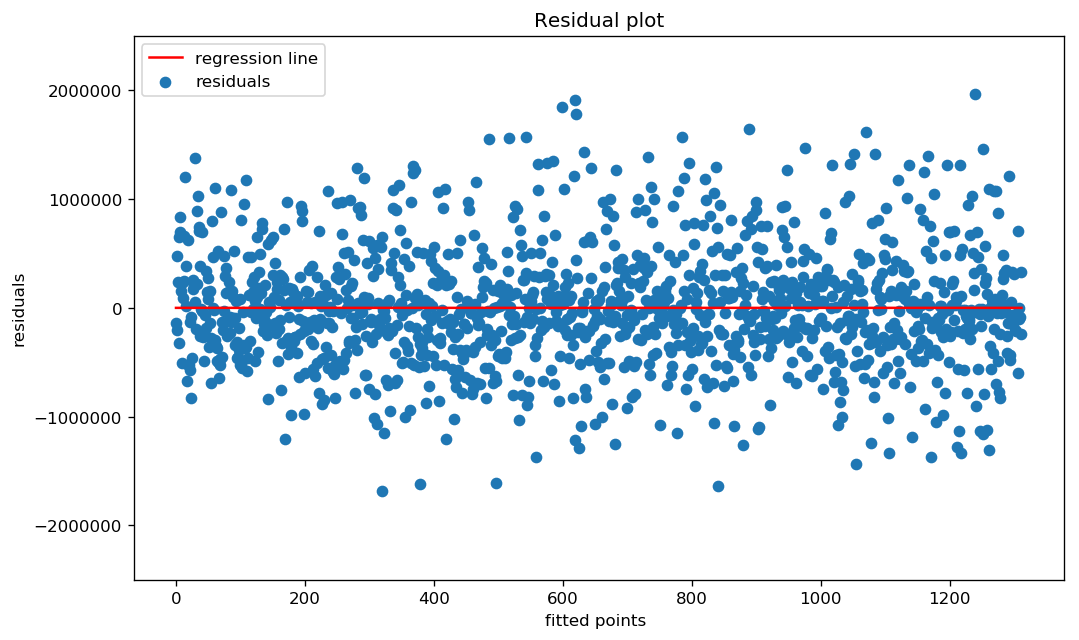

In [77]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,1312)
k = [0 for i in range(0,1312)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-2500000, 2500000)
plt.legend()

### Checking Distribution of Residuals

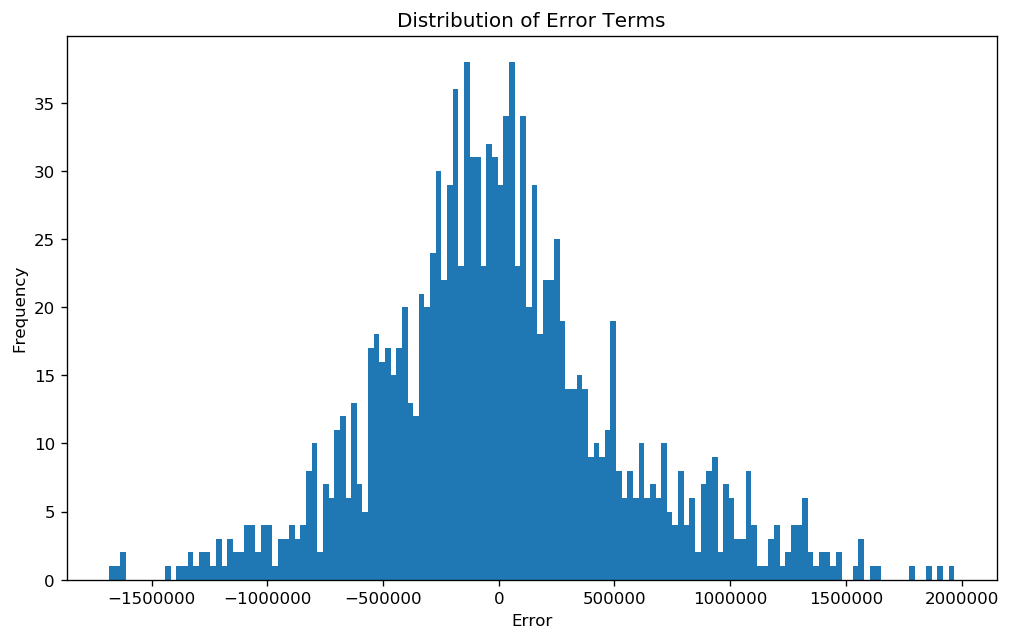

In [78]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

### QQ-Plot (Is the data Normally Distributed?)

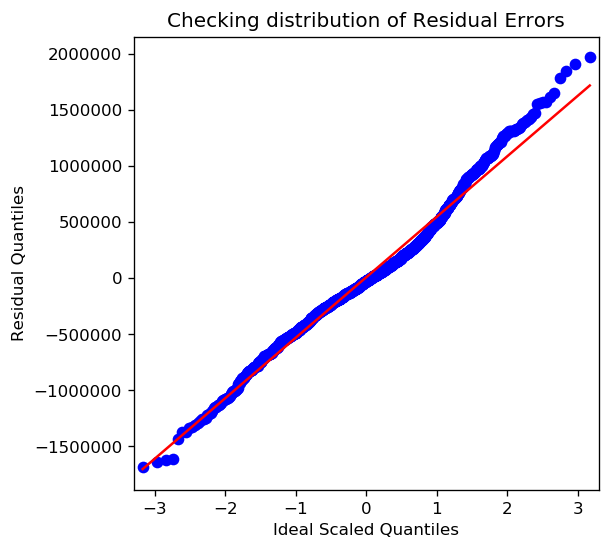

In [79]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [80]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(df_final.values, i) for i in range(df_final.shape[1])], index =df_final.columns)
VIF

INT_SQFT                  206.793637
DIST_MAINROAD               3.953275
N_BEDROOM                  67.342407
N_BATHROOM                 35.231124
N_ROOM                    278.232523
QS_ROOMS                  139.882869
QS_BATHROOM               168.552702
QS_BEDROOM                207.808881
QS_OVERALL               1347.020441
COMMIS                      9.204462
SALES_PRICE               183.525257
AREA_Anna Nagar             4.176345
AREA_Chrompet               4.010320
AREA_KK Nagar               6.658756
AREA_Karapakkam             4.365885
AREA_T Nagar                2.967590
AREA_Velachery              5.622280
SALE_COND_AdjLand           2.094000
SALE_COND_Family            1.969586
SALE_COND_Normal Sale       1.982838
SALE_COND_Partial           2.000239
PARK_FACIL_Noo              1.007673
PARK_FACIL_Yes              3.003514
BUILDTYPE_House            11.092792
BUILDTYPE_Others            7.929808
UTILITY_AVAIL_ELO           1.870728
UTILITY_AVAIL_NoSeWa        1.989580
U

## Model Interpretability

In [81]:
# Creating instance of Linear Regresssion
lr = LinearRegression(normalize = True)

# Fitting the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [82]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(x_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 405350.02506829944


In [83]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(x_test)
k = mae(test_predict, y_test)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     403938.3403516674


Text(0.5,1,'Normalized Coefficient plot')

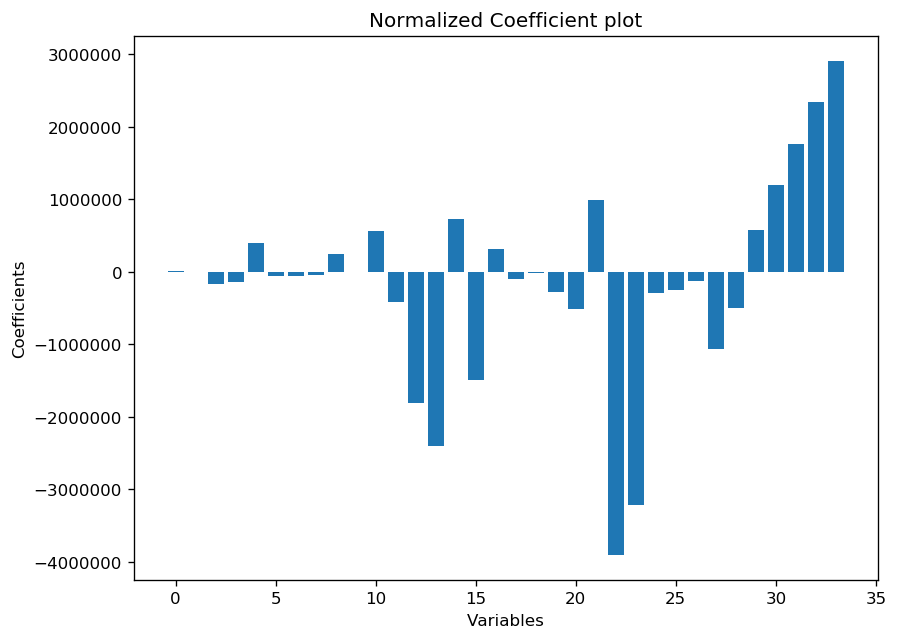

In [84]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

#### Creating new subsets of data

In [85]:
df_final.columns.drop('SALES_PRICE')

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'COMMIS',
       'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam',
       'AREA_T Nagar', 'AREA_Velachery', 'SALE_COND_AdjLand',
       'SALE_COND_Family', 'SALE_COND_Normal Sale', 'SALE_COND_Partial',
       'PARK_FACIL_Noo', 'PARK_FACIL_Yes', 'BUILDTYPE_House',
       'BUILDTYPE_Others', 'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSeWa',
       'UTILITY_AVAIL_NoSewr ', 'STREET_No Access', 'STREET_Paved', 'MZZONE_C',
       'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_trans = pd.DataFrame(data = scaler.fit_transform(df_final.drop(['SALES_PRICE'],axis=1)), columns = df_final.columns.drop('SALES_PRICE'))
#seperating independent and dependent variables
x = df_trans
y = df_final['SALES_PRICE']
x.shape, y.shape

((6560, 34), (6560,))

In [87]:
x.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,0.2520,0.655,0.000000,0.0,0.25,0.666667,0.633333,0.966667,0.784512,0.332168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.2045,0.350,0.000000,0.0,0.25,0.700000,0.600000,0.066667,0.367003,0.207529,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.6775,0.070,0.666667,1.0,0.75,0.900000,0.633333,0.533333,0.676768,0.171601,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.3630,0.420,0.000000,0.0,0.25,0.333333,0.166667,0.700000,0.434343,0.164500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.3600,0.180,0.333333,0.0,0.50,0.833333,0.200000,0.366667,0.444444,0.460691,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 56)

In [89]:
# Creating instance of Linear Regresssion
lr = LinearRegression(normalize = True)

# Fitting the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [90]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(x_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 407948.8375529586


In [91]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(x_test)
k = mae(test_predict, y_test)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     399569.94908014673


In [92]:

## Percentage of error
def percentage(actual, predicted, n):
    err = 0
    for i in range(n):
        err += abs(actual.iloc[i] - predicted[i])/actual.iloc[i]
    total = err/n
    return(total)

train_percentage_error = percentage(y_train,train_predict,len(y_train))
test_percentage_error = percentage(y_test,test_predict,len(y_test))

In [93]:
train_percentage_error

0.04535659696778415

In [94]:
test_percentage_error

0.04386761359054424